<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = load_iris()
iris.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [4]:
X = iris.data[:,1:] #we have picked features sepal_width, petal_length and petal_width
y = iris.target

req_features = iris.feature_names
del req_features[0]
req_features

['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
clf = DecisionTreeClassifier(max_leaf_nodes = 4)
fit_obj = clf.fit(X,y)

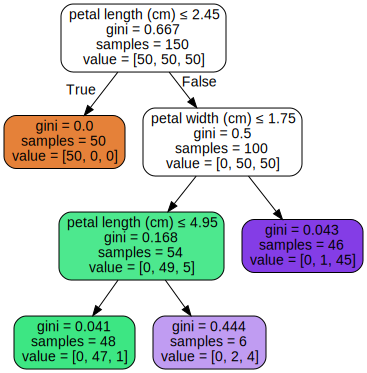

In [7]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(fit_obj, out_file = None,
                               feature_names = req_features,
                               filled= True, rounded= True,
                               special_characters= True)
graph = graphviz.Source(dot_data)
graph

# Plot Decision boundaries

Text(0.5,0,'Petal Width')

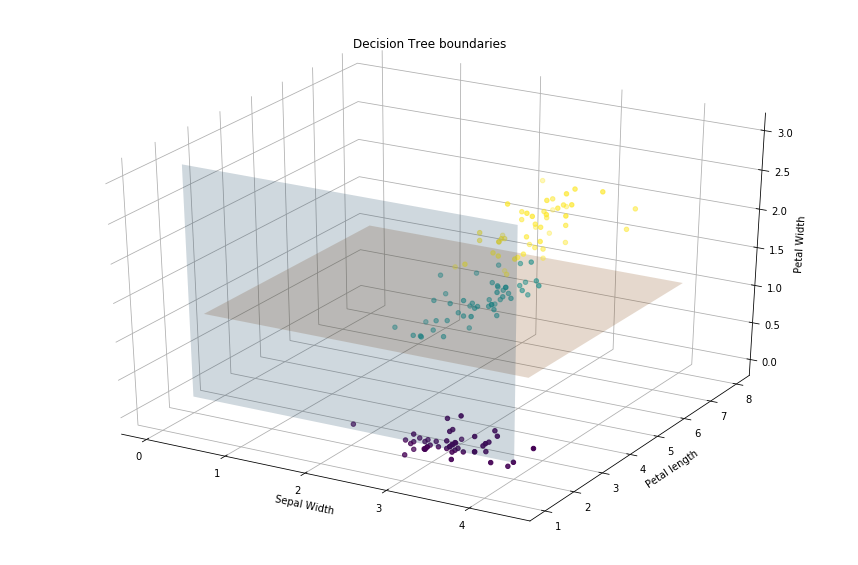

In [26]:
#plotting code

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

# Get rid of colored axes planes
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

ax.scatter(xs = X[:,0], ys = X[:,1], zs = X[:,2],label = 'Training Data',c=y)

#decision boundry 1
xx, zz = np.meshgrid(range(2), range(2))
xx = xx*4
zz = zz*3
yy = np.full_like(xx,2.45)
ax.plot_surface(xx, yy, zz, alpha = 0.2, label='Decision Boundry CHits= 450')

#decision boundry 2
yy, xx = np.meshgrid(np.linspace(2.45,8,2), range(2))
xx = xx*4
zz = np.full_like(xx,1.75)
ax.plot_surface(xx, yy, zz, alpha = 0.2, label='Decision Boundry CHits>= 450 and Walks=61')

ax.set_title("Decision Tree boundaries")
ax.set_xlabel("Sepal Width")
ax.set_ylabel("Petal length")
ax.set_zlabel("Petal Width")